In [1]:
from qiskit import *
import random 
import numpy as np
from numpy import pi

## Mapeamento

In [2]:
# Registrar os qubits
secret = QuantumRegister(1,'Q')
Alice = QuantumRegister(1, 'A')
Bob = QuantumRegister(1, 'B')

# Registrar os bits clássicos
cr = ClassicalRegister(3 , 'c')

#Criação do circuito 
qc = QuantumCircuit(secret,Alice,Bob,cr)

### Estado de Bell

In [3]:
#Porta hadamard em Alice
qc.h(Alice)

#Porta CNOT com controlador Alice e alvo Bob
qc.cx(Alice,Bob)

qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "Q"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

In [4]:
np.random.seed(42)
theta = np.random.uniform(0.0 , 1.0) *np.pi
varphi = np.random.uniform(0.0, 2.0)* np.pi

In [5]:
# Porta U rotação de um qubit em 3 ângulos de euler
qc.u(theta,varphi, 0.0, secret)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "Q"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

### Criando um base de Bell para medição em Alice

In [6]:
#Passar um porta CNOT, tem com controlador secret e alvo Alice
qc.cx(secret,Alice)

#Porta hadamard em secret
qc.h(secret)
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(1, "Q"), index=0>, <Qubit register=(1, "A"), index=0>, <Qubit register=(1, "B"), index=0>), clbits=())

In [7]:
#
qc.measure(Alice,cr[1])
qc.measure(secret,cr[0])

In [8]:
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0],1)):
    qc.z(Bob)

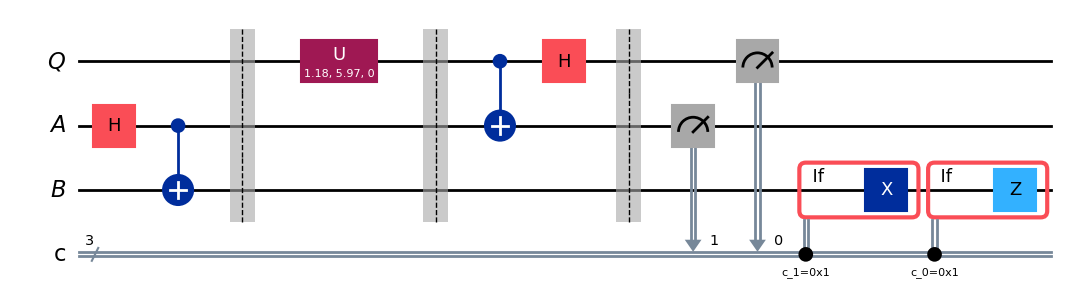

In [9]:
qc.draw(output='mpl')

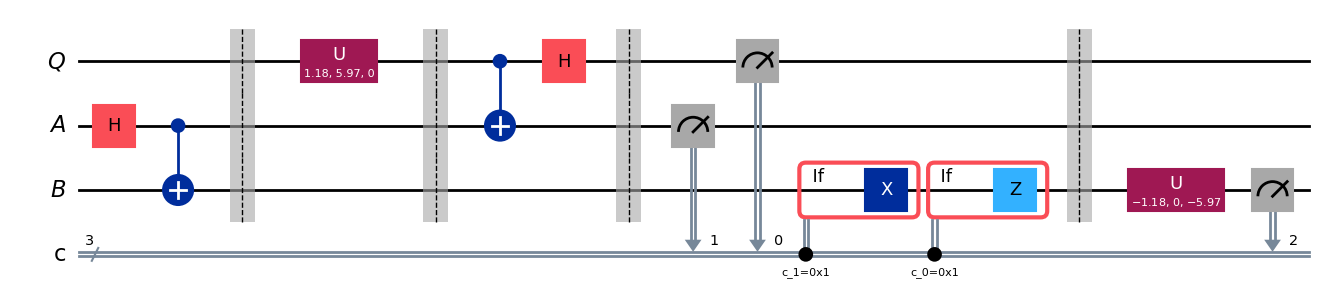

In [10]:
qc.barrier()

qc.u(theta, varphi, 0.0, Bob).inverse()
qc.measure(Bob,cr[2])

qc.draw(output='mpl')

## Otimização

In [11]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()

backend = service.least_busy(operational=True,simulator = False, min_num_qubits=127)

print(backend.name)

ibm_sherbrooke


In [12]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
qc_isa = pm.run(qc)

In [13]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode = backend)

In [14]:
from qiskit.primitives import BackendSamplerV2

from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(backend)
backend_sim = AerSimulator(noise_model=noise_model)

from qiskit.providers.fake_provider import GenericBackendV2
backend_gen = GenericBackendV2(num_qubits=18)
sampler_gen = BackendSamplerV2(backend = backend_gen)

In [15]:
job = sampler.run([qc_isa])

res = job.result()
counts = res[0].data.c.get_counts()

c:\Users\ianre\miniconda3\envs\cwq\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:857: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


KeyboardInterrupt: 

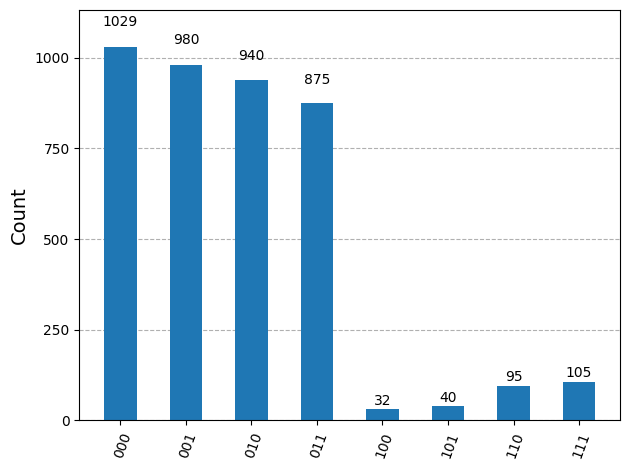

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)